# Distribution of income across richer and poorer groups (after tax)

Source

World Inequality Database (WID.world) – World Inequality Database (WID)

Retrieved on: 2024-07-04Retrieved from: https://wid.world

SI.DST.FRST.20 Income share held by lowest 20%

## I. Load libraries

In [301]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid", context="paper")

In [89]:
# Create a file path
data_path = '/Users/nataschajademinnitt/Documents/5. Data Analysis/distributionofthings.analysis/7_lorenz_curve/data/raw/'
results_path = '/Users/nataschajademinnitt/Documents/5. Data Analysis/distributionofthings.analysis/7_lorenz_curve/results/'

## II. Data cleaning

In [245]:
# Load data FIRST
raw_1st = pd.read_csv(data_path + '1ST.csv', skiprows=4)

# Mean for past 10 years
raw_1st['mean'] = raw_1st.iloc[:, 57:68].mean(axis=1, skipna=True) # computes the mean row wise

# Median for past 10 years
raw_1st['median'] = raw_1st.iloc[:, 57:68].median(axis=1, skipna=True)

# Check the variability between the mean and median
raw_1st['diff'] =  ((raw_1st['mean'] - raw_1st['median']) / raw_1st['mean']) * 100

# Create rule to use median when the difference is > 5 %
raw_1st['First'] = np.where(raw_1st['mean'] < 5, raw_1st['mean'], raw_1st['median'])

# Drop all unwanted columns
clean_1st = raw_1st[['Country Name', 'Country Code', 'First']]

In [247]:
# Load data SECOND
raw_2nd = pd.read_csv(data_path + '2ND.csv', skiprows=4)

# Mean for past 10 years
raw_2nd['mean'] = raw_2nd.iloc[:, 57:68].mean(axis=1, skipna=True) # computes the mean row wise

# Median for past 10 years
raw_2nd['median'] = raw_2nd.iloc[:, 57:68].median(axis=1, skipna=True)

# Check the variability between the mean and median
raw_2nd['diff'] =  ((raw_2nd['mean'] - raw_2nd['median']) / raw_2nd['mean']) * 100

# Create rule to use median when the difference is > 5 %
raw_2nd['Second'] = np.where(raw_2nd['mean'] < 5, raw_2nd['mean'], raw_2nd['median'])

# Drop all unwanted columns
clean_2nd = raw_2nd[['Country Name', 'Country Code', 'Second']]

In [249]:
# Load data THIRD
raw_3rd = pd.read_csv(data_path + '3RD.csv', skiprows=4)

# Mean for past 10 years
raw_3rd['mean'] = raw_3rd.iloc[:, 57:68].mean(axis=1, skipna=True)

# Median for past 10 years
raw_3rd['median'] = raw_3rd.iloc[:, 57:68].median(axis=1, skipna=True)

# Check the variability between the mean and median
raw_3rd['diff'] = ((raw_3rd['mean'] - raw_3rd['median']) / raw_3rd['mean']) * 100

# Create rule to use median when the difference is > 5 %
raw_3rd['Third'] = np.where(raw_3rd['mean'] < 5, raw_3rd['mean'], raw_3rd['median'])

# Drop all unwanted columns
clean_3rd = raw_3rd[['Country Name', 'Country Code', 'Third']]

In [251]:
# Load data FOURTH
raw_4th = pd.read_csv(data_path + '4TH.csv', skiprows=4)

# Mean for past 10 years
raw_4th['mean'] = raw_4th.iloc[:, 57:68].mean(axis=1, skipna=True)

# Median for past 10 years
raw_4th['median'] = raw_4th.iloc[:, 57:68].median(axis=1, skipna=True)

# Check the variability between the mean and median
raw_4th['diff'] = ((raw_4th['mean'] - raw_4th['median']) / raw_4th['mean']) * 100

# Create rule to use median when the difference is > 5 %
raw_4th['Fourth'] = np.where(raw_4th['mean'] < 5, raw_4th['mean'], raw_4th['median'])

# Drop all unwanted columns
clean_4th = raw_4th[['Country Name', 'Country Code', 'Fourth']]

In [253]:
# Load data FIFTH
raw_5th = pd.read_csv(data_path + '5TH.csv', skiprows=4)

# Mean for past 10 years
raw_5th['mean'] = raw_5th.iloc[:, 57:68].mean(axis=1, skipna=True)

# Median for past 10 years
raw_5th['median'] = raw_5th.iloc[:, 57:68].median(axis=1, skipna=True)

# Check the variability between the mean and median
raw_5th['diff'] = ((raw_5th['mean'] - raw_5th['median']) / raw_5th['mean']) * 100

# Create rule to use median when the difference is > 5 %
raw_5th['Fifth'] = np.where(raw_5th['mean'] < 5, raw_5th['mean'], raw_5th['median'])

# Drop all unwanted columns
clean_5th = raw_5th[['Country Name', 'Country Code', 'Fifth']]

In [417]:
# Convert to DataFrame for easier handling
classification = pd.read_excel(data_path + 'name_classification.xlsx', sheet_name=0)
classification.rename(columns={'Country' : 'Country Name', 'Code' : 'Country Code'}, inplace=True)

In [419]:
df_merged = classification.merge(clean_1st, on=['Country Name', 'Country Code']) \
                        .merge(clean_2nd, on=['Country Name', 'Country Code']) \
                        .merge(clean_3rd, on=['Country Name', 'Country Code']) \
                        .merge(clean_4th, on=['Country Name', 'Country Code']) \
                        .merge(clean_5th, on=['Country Name', 'Country Code'])

# Subset df_merged to include rows without NaN values
df_merged = df_merged.dropna(subset=['First', 'Second', 'Third', 'Fourth', 'Fifth'])

In [421]:
# Proportional scaling to make each row equal to 100
columns_to_normalize = ['First', 'Second', 'Third', 'Fourth', 'Fifth']

# Sum of values in First to Fifth for each row
df_merged['total'] = df_merged[columns_to_normalize].sum(axis=1)

# Proportional scaling to ensure values sum to 100
for col in columns_to_normalize:
    df_merged[col] = (df_merged[col] / df_merged['total']) * 100

# Drop the total column if no longer needed
df_merged = df_merged.drop(columns=['total'])

# Display the updated DataFrame
print(df_merged[columns_to_normalize].sum(axis=1).describe())

count    1.470000e+02
mean     1.000000e+02
std      6.441758e-15
min      1.000000e+02
25%      1.000000e+02
50%      1.000000e+02
75%      1.000000e+02
max      1.000000e+02
dtype: float64


In [423]:
# Creating a GINI indicator

def gini_from_quintiles(row):
    # Quintile income shares (ensure normalized)
    quintiles = ['First', 'Second', 'Third', 'Fourth', 'Fifth']
    income_shares = row[quintiles].values / 100  # Normalize to fractions if they are in percentages
    
    # Cumulative population shares (20%, 40%, ..., 100%)
    population_shares = np.linspace(0.2, 1.0, len(quintiles))
    
    # Cumulative income shares
    cumulative_income = np.cumsum(income_shares)
    
    # Add (0, 0) point for Lorenz Curve
    population_shares = np.insert(population_shares, 0, 0)
    cumulative_income = np.insert(cumulative_income, 0, 0)
    
    # Calculate Gini coefficient using trapezoidal rule
    gini = 1 - np.sum((cumulative_income[1:] + cumulative_income[:-1]) * 
                      (population_shares[1:] - population_shares[:-1]))
    return gini

# Apply to the DataFrame
df_merged['Gini'] = df_merged.apply(gini_from_quintiles, axis=1)

In [460]:
df_merged[df_merged['Region'] == "Sub-Saharan Africa"]

,Country Name,Country Code,Region,Income group,Lending category,First,Second,Third,Fourth,Fifth,Gini
79,Guinea,GIN,Sub-Saharan Africa,Lower middle income,IDA,8.500000,13.100000,17.300000,22.900000,38.200000,0.276800
123,Mauritania,MRT,Sub-Saharan Africa,Lower middle income,IDA,7.650000,12.450000,16.850000,22.950000,40.100000,0.301600
182,Sudan,SDN,Sub-Saharan Africa,Low income,IDA,7.792208,12.087912,16.083916,21.678322,42.357642,0.314885
141,Niger,NER,Sub-Saharan Africa,Low income,IDA,7.902736,11.955420,16.109422,21.073961,42.958460,0.316920
80,Guinea-Bissau,GNB,Sub-Saharan Africa,Low income,IDA,7.853927,11.755878,15.957979,22.111056,42.321161,0.317159
110,Liberia,LBR,Sub-Saharan Africa,Low income,IDA,7.503752,11.855928,16.308154,22.261131,42.071036,0.318159
62,Ethiopia,ETH,Sub-Saharan Africa,Low income,IDA,7.307307,12.112112,16.316316,21.221221,43.043043,0.322322
167,Sierra Leone,SLE,Sub-Saharan Africa,Low income,IDA,7.892108,11.688312,15.284715,20.979021,44.155844,0.327273
142,Nigeria,NGA,Sub-Saharan Africa,Lower middle income,Blend,7.050000,11.450000,16.000000,22.750000,42.750000,0.330800
120,Mali,MLI,Sub-Saharan Africa,Low income,IDA,7.550000,11.350000,15.400000,21.850000,43.850000,0.332400


In [425]:
df_merged = df_merged.sort_values(by='Gini', ascending=True)

In [446]:
df_sub = df_merged.iloc[::45] # Select every 18th row from the dataframe
df_min = df_merged.nlargest(1, 'Gini') # Make sure the country with the highest cost is included
df_selected = pd.concat([df_sub, df_min]) # Concatinate the two dataframes

# Display the result
df_selected.head(12)

,Country Name,Country Code,Region,Income group,Lending category,First,Second,Third,Fourth,Fifth,Gini
171,Slovenia,SVN,Europe & Central Asia,High income,NaN,9.990010,14.685315,18.181818,22.477522,34.665335,0.228571
185,Switzerland,CHE,Europe & Central Asia,High income,NaN,7.707708,12.412412,16.616617,22.522523,40.740741,0.304705
95,Jamaica,JAM,Latin America & Caribbean,Upper middle income,IBRD,6.450000,10.950000,15.500000,22.400000,44.700000,0.351800
46,Costa Rica,CRI,Latin America & Caribbean,Upper middle income,IBRD,4.282733,8.383994,12.775610,20.760367,53.797296,0.445622
174,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,IBRD,2.397602,4.795205,8.191808,16.483516,68.131868,0.572627


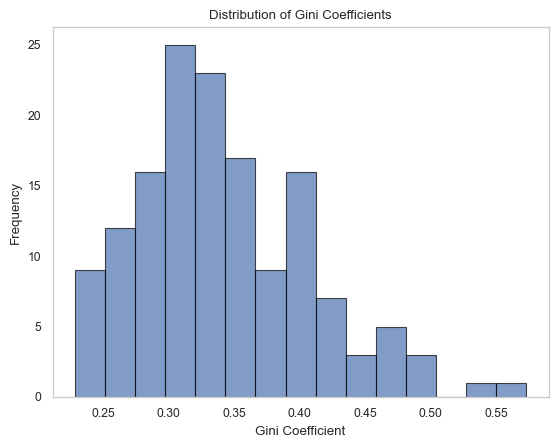

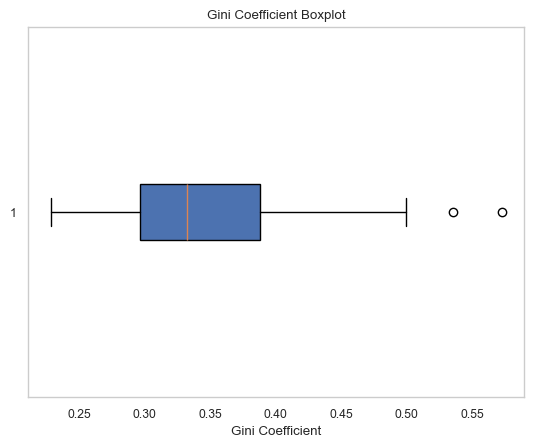

In [348]:
import matplotlib.pyplot as plt

# Histogram
plt.hist(df_merged['Gini'], bins=15, edgecolor='black', alpha=0.7)
plt.title("Distribution of Gini Coefficients")
plt.xlabel("Gini Coefficient")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Boxplot
plt.boxplot(df_merged['Gini'], vert=False, patch_artist=True)
plt.title("Gini Coefficient Boxplot")
plt.xlabel("Gini Coefficient")
plt.grid()
plt.show()

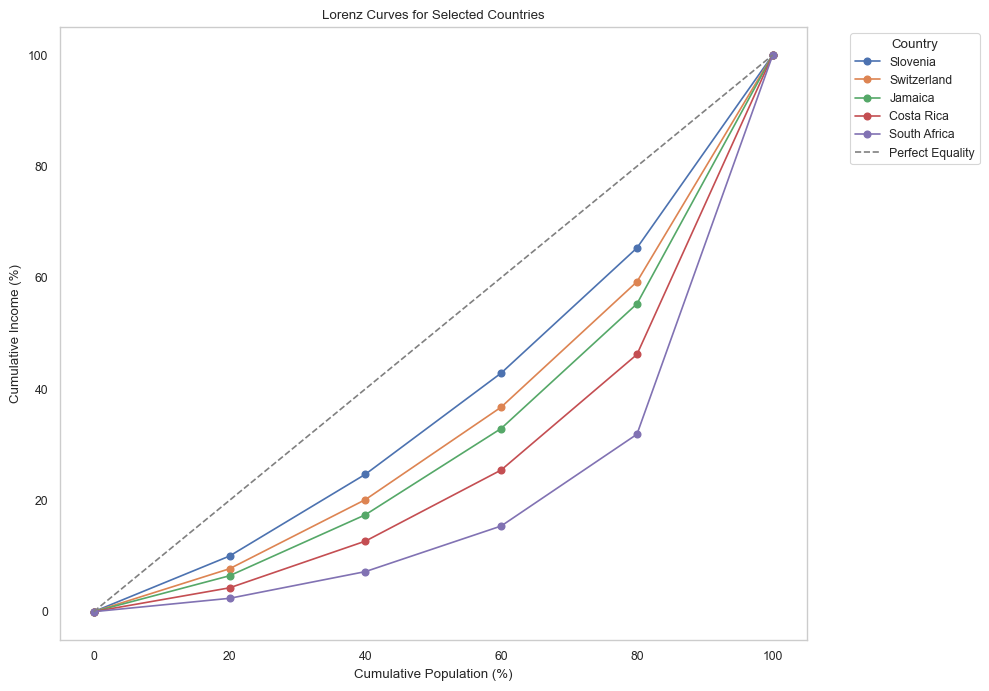

In [448]:
# Define quintile columns
quintile_cols = ['First', 'Second', 'Third', 'Fourth', 'Fifth']

# Initialize the plot
plt.figure(figsize=(10, 7))

# Plot Lorenz Curves for each selected country
for _, row in df_selected.iterrows():
    # Cumulative income percentages
    cumulative_income = np.cumsum(row[quintile_cols].values / 100)  # Normalize to fractions
    cumulative_income = np.insert(cumulative_income, 0, 0)  # Add (0,0) point
    
    # Population percentages
    population_percentages = np.linspace(0, 1, len(quintile_cols) + 1)
    
    # Plot the Lorenz Curve
    plt.plot(population_percentages * 100, cumulative_income * 100, label=row['Country Name'], marker='o')

# Plot the line of perfect equality
plt.plot([0, 100], [0, 100], label="Perfect Equality", linestyle="--", color="gray")

# Add legend, labels, and title
plt.title("Lorenz Curves for Selected Countries")
plt.xlabel("Cumulative Population (%)")
plt.ylabel("Cumulative Income (%)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

## III. Data analysis

In [291]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 1 to 211
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      147 non-null    object 
 1   Country Code      147 non-null    object 
 2   Region            147 non-null    object 
 3   Income group      147 non-null    object 
 4   Lending category  111 non-null    object 
 5   First             147 non-null    float64
 6   Second            147 non-null    float64
 7   Third             147 non-null    float64
 8   Fourth            147 non-null    float64
 9   Fifth             147 non-null    float64
dtypes: float64(5), object(5)
memory usage: 12.6+ KB


## IV. Data visualisation

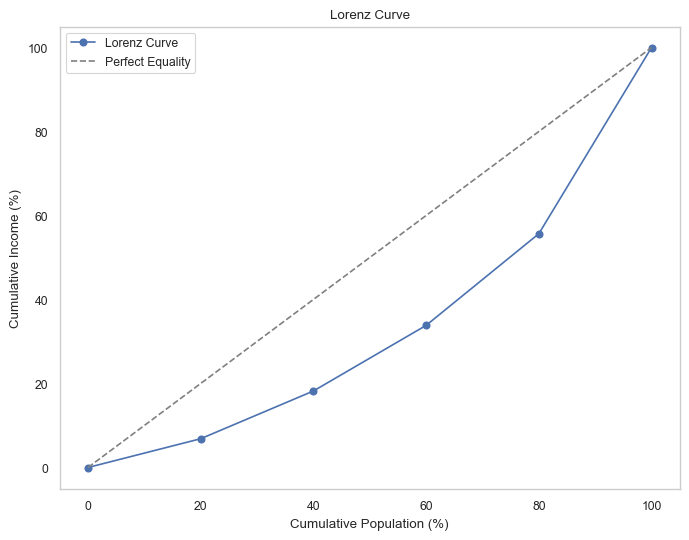

In [309]:
# Select columns for quintile income shares
quintile_cols = ['First', 'Second', 'Third', 'Fourth', 'Fifth']

# Calculate cumulative income percentages
cumulative_income_percentages = np.cumsum(df_merged[quintile_cols].mean())  # Row-wise mean
cumulative_income_percentages = cumulative_income_percentages / cumulative_income_percentages.iloc[-1] * 100

# Population percentages (evenly spaced for quintiles)
population_percentages = np.linspace(0, 100, len(quintile_cols) + 1)

# Add (0,0) point for Lorenz Curve
cumulative_income_percentages = np.insert(cumulative_income_percentages, 0, 0)

# Plot the Lorenz Curve
plt.figure(figsize=(8, 6))
plt.plot(population_percentages, cumulative_income_percentages, label="Lorenz Curve", marker='o')
plt.plot([0, 100], [0, 100], label="Perfect Equality", linestyle="--", color="gray")
plt.title("Lorenz Curve")
plt.xlabel("Cumulative Population (%)")
plt.ylabel("Cumulative Income (%)")
plt.legend()
plt.grid()
plt.show()